# 🧠 Sales Prediction Task
This notebook forecasts car purchase amounts based on customer features using regression models.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## 📥 Load Dataset

In [19]:
df = pd.read_csv('D:\gpu coding\car_purchasing.csv', encoding='latin1')  # adjust path if needed
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## 🔍 Initial Inspection

In [20]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

## 🧹 Drop Unnecessary Columns

In [21]:
df.drop(['customer name', 'customer e-mail'], axis=1, inplace=True)

## 🔢 Encode and Clean Data

In [22]:
df['gender'] = df['gender'].astype(int)

## 📊 Outlier Detection (Boxplots)

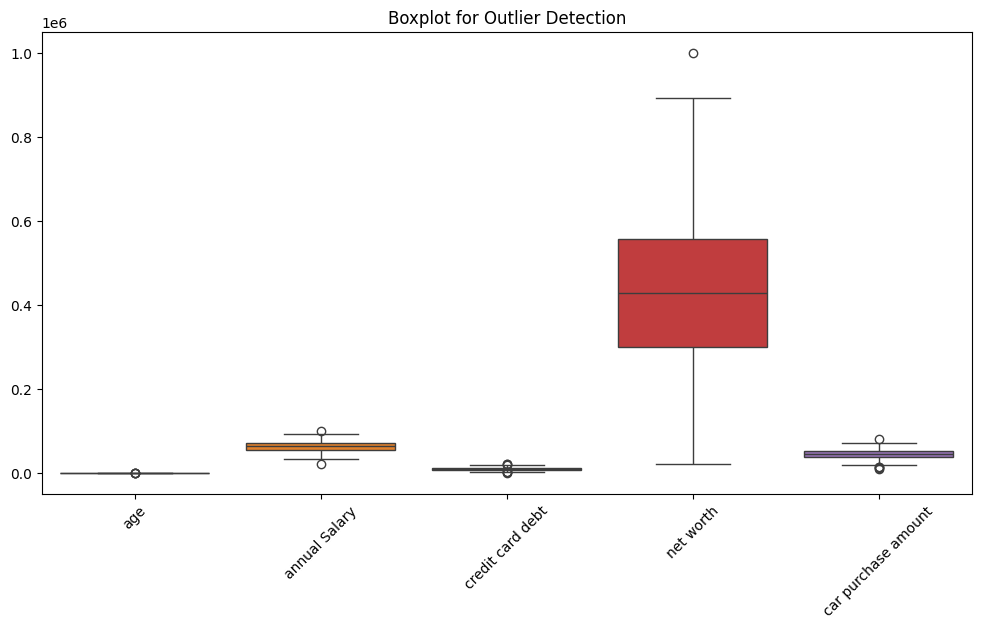

In [23]:
numeric_cols = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

## 🔍 Feature Scaling

In [24]:
X = pd.get_dummies(df.drop('car purchase amount', axis=1), drop_first=True)
# X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔀 Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🤖 Model Training and Evaluation

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print('-' * 30)

Model: Linear Regression
MAE: 68807884708767.53
RMSE: 176292070860698.06
R²: -287839073970589204480.00
------------------------------
Model: Random Forest
MAE: 1670.12
RMSE: 2385.60
R²: 0.95
------------------------------


In [30]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, xgb_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.2f}")
print(f"R²: {r2_score(y_test, xgb_pred):.2f}")


XGBoost Regressor Performance:
MAE: 1536.17
RMSE: 2158.34
R²: 0.96


## Feature Importance

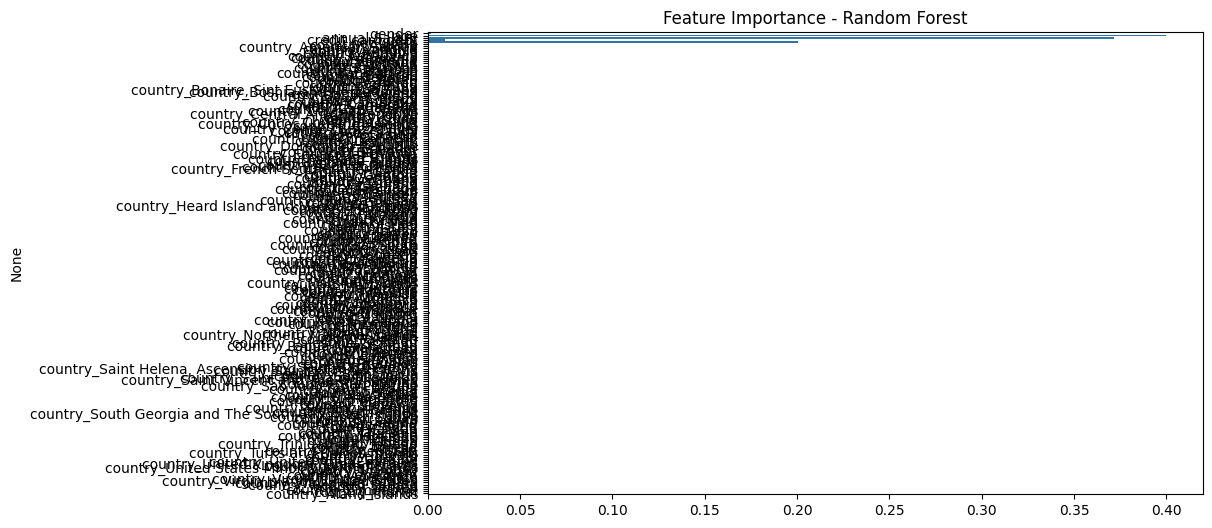

In [34]:
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()

## 📈 Actual vs Predicted

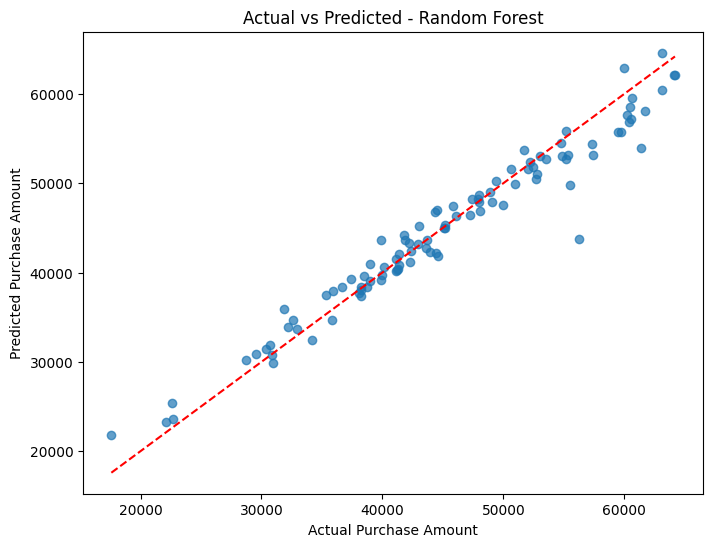

In [28]:
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted - Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [29]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\dell7\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


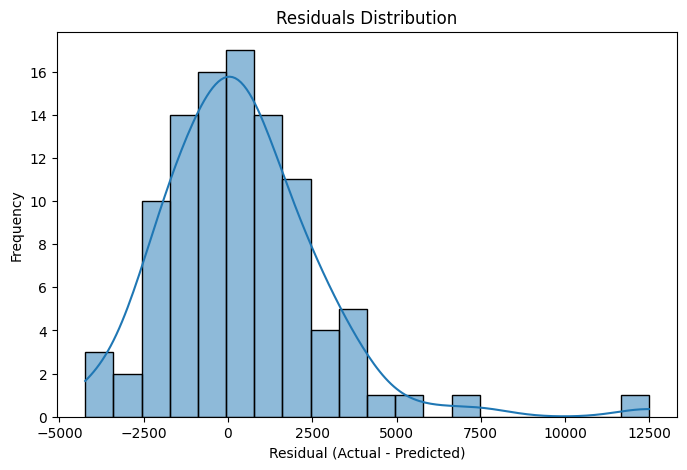

In [35]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()
